In [58]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from pandas import DataFrame
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [61]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


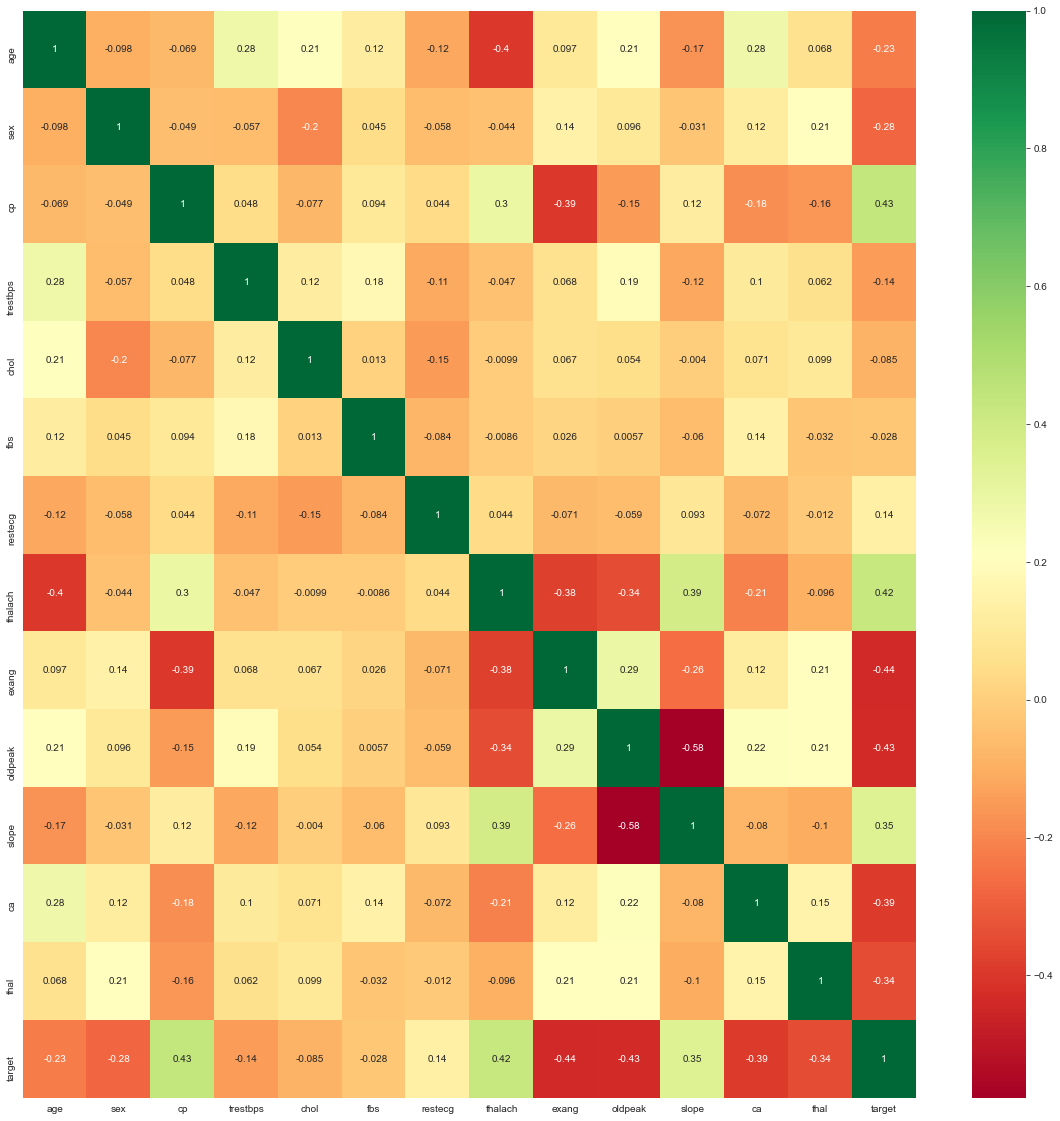

In [62]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

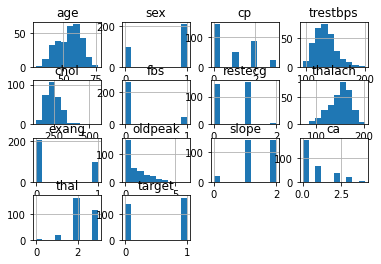

In [6]:
df.hist()

<AxesSubplot:xlabel='target', ylabel='count'>

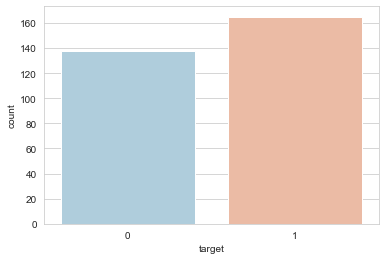

In [63]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [17]:
# dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [55]:
# from sklearn.preprocessing import StandardScaler
# standardScaler = StandardScaler()
# columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [67]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [68]:
X_train.shape
print(X_train.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [69]:
X_test.shape

(61, 13)

In [70]:
Y_train.shape

(242,)

In [71]:
Y_test.shape

(61,)

In [72]:
#  for model fitting
from sklearn.metrics import accuracy_score

In [73]:
from sklearn.model_selection import cross_val_score
knn_scores = []
score = 0
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X_train,Y_train,cv=10)
    knn_scores.append(score.mean())
print(score)
knn_classifier.fit(X_train, Y_train)

[0.68       0.72       0.33333333 0.66666667 0.70833333 0.70833333
 0.625      0.75       0.58333333 0.75      ]


KNeighborsClassifier(n_neighbors=20)

In [74]:
Y_pred_knn=knn_classifier.predict(X_test)
Y_pred_knn.shape

(61,)

In [75]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.85 %


In [76]:
# save the model to disk
filename = 'finalized_model1.sav'
pickle.dump(knn_classifier, open(filename, 'wb'))
score.mean()

0.6525

In [77]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train, Y_train)
print(result)

0.6818181818181818


In [79]:
print(X_test.columns)
X_new = np.array([63,1,3,145,233,1,0,150,0,2.3,0,0,1])
preds = loaded_model.predict(X_new.reshape(1, -1 ))
print(preds)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
[1]


In [82]:
preds = loaded_model.predict(X_test)
print(preds)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,preds))
print(classification_report(Y_test,preds))

[0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0]
[[21  6]
 [13 21]]
              precision    recall  f1-score   support

           0       0.62      0.78      0.69        27
           1       0.78      0.62      0.69        34

    accuracy                           0.69        61
   macro avg       0.70      0.70      0.69        61
weighted avg       0.71      0.69      0.69        61

